In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


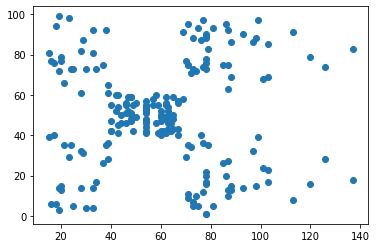

In [6]:
plt.scatter(x=df['Annual Income (k$)'], y = df['Spending Score (1-100)']);

In [7]:
X = df.iloc[:, [3,4]].values

In [11]:
%%time
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Abdullah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abdullah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abdullah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abdullah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

Wall time: 15.5 s


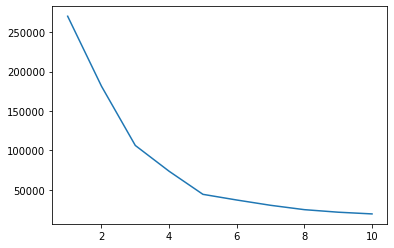

In [13]:
plt.plot(range(1, 11), wcss);

In [16]:
kmeans = KMeans(n_clusters=5, init = 'k-means++')
y = kmeans.fit_predict(X)

C:\Users\Abdullah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
len(y)

200

In [21]:
df['cluster'] = y

In [22]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


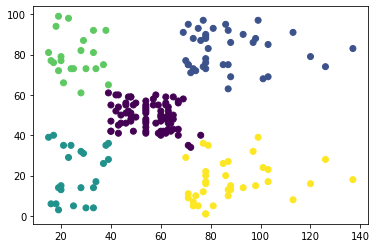

In [24]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'].astype('category').cat.codes);

In [26]:
pca = PCA(n_components=2)

In [30]:
X_reduced = pca.fit_transform(df.iloc[:, [2,3,4]])

In [31]:
X_reduced

array([[-3.18705078e+01, -3.30014253e+01],
       [ 7.63396908e-01, -5.68438653e+01],
       [-5.74087256e+01, -1.31229362e+01],
       [-2.16989648e+00, -5.34779049e+01],
       [-3.21749197e+01, -3.03870050e+01],
       [-2.17827777e+00, -5.22265808e+01],
       [-5.90660565e+01, -9.54170669e+00],
       [ 1.23693261e+01, -6.16176843e+01],
       [-6.63156568e+01, -3.21359934e+00],
       [-5.65677534e+00, -4.72664534e+01],
       [-5.82366179e+01, -9.13375312e+00],
       [ 1.46202592e+01, -6.21072940e+01],
       [-5.51612126e+01, -1.00779778e+01],
       [-4.30660584e-03, -5.01134367e+01],
       [-5.27647474e+01, -1.16804199e+01],
       [ 1.94563480e+00, -5.15231943e+01],
       [-3.45062349e+01, -2.37600734e+01],
       [-7.30573032e+00, -4.35158724e+01],
       [-4.12574933e+01, -1.64734320e+01],
       [ 1.61888268e+01, -5.82998775e+01],
       [-3.27403118e+01, -2.13349462e+01],
       [-9.82702739e-01, -4.44533143e+01],
       [-5.78102821e+01, -1.86854579e+00],
       [-1.

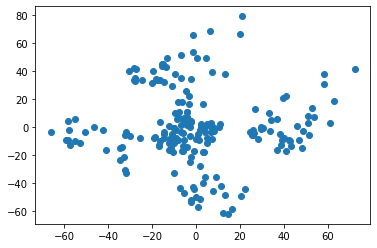

In [34]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])